In [1]:
import numpy as np
from vggFaceModel import vgg_face
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [2]:
def reshapeImage(path):
    im = Image.open(path)
    im = im.resize((224,224))
    im = np.array(im).astype(np.float32) / 255
    im = np.expand_dims(im, axis=0)
    return im

In [3]:
model = vgg_face('vggFace/vgg_face_weights.h5')
print(model.summary())

2021-09-14 15:01:46.651873: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [4]:
layer = model.layers[3]
filters, biases = layer.get_weights()
print(layer.name, filters.shape)
print(layer.name, biases.shape)

conv2d_1 (3, 3, 64, 64)
conv2d_1 (64,)


In [5]:
outputs = model.layers[3].output
new_model = Model(inputs=model.inputs, outputs=outputs)
print(new_model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
feature_output = new_model.predict(reshapeImage('me2.jpg'))

2021-09-14 15:01:54.878603: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


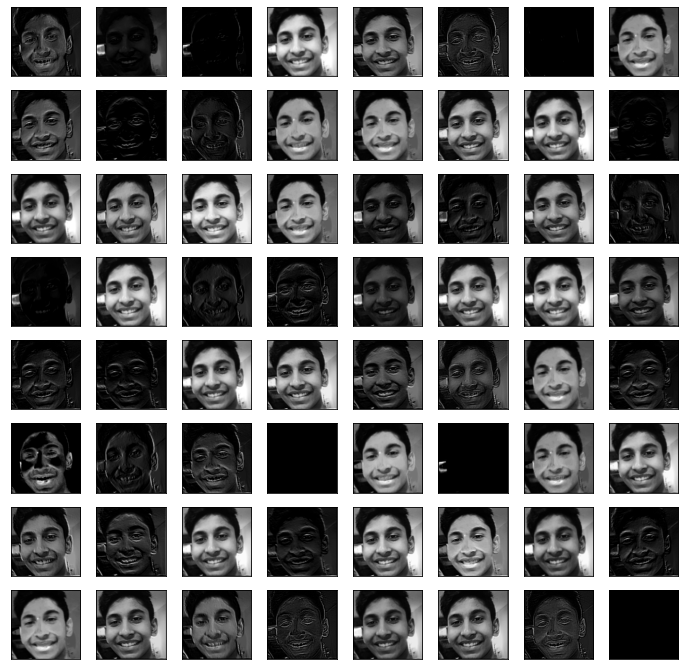

In [7]:
number_of_filters = feature_output.shape[-1]
fig = plt.figure(figsize=(12,12))
rows = 8
colums = 8
for i in range(1, rows*colums + 1):
    fig = plt.subplot(rows, colums, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(feature_output[0, :, :, i-1], cmap='gray')